In [1]:
import scanpy as sc
from matplotlib import pyplot as plt

sc.set_figure_params(dpi=100)
plt.rcParams["figure.figsize"] = [6, 4]

import warnings

warnings.filterwarnings("ignore")

In [2]:
from scimilarity.utils import lognorm_counts, align_dataset
from scimilarity import CellQuery

In [3]:
import os

In [4]:
os.getcwd()

'/mmt/NEO/Sucre Lab/Shawyon/Code'

In [5]:
# Instantiate the CellQuery object
# Set model_path to the location of the uncompressed model

model_path = "/home/shirazs/scimilarity/model_v1.1"

cq = CellQuery(model_path)

# Part Advanced

In [6]:
# Load the tutorial data
# Set data_path to the location of the tutorial dataset
data_path = "../data/figures/20240307_merged_devodata_newharmony_scimilarity.h5ad"
adata = sc.read(data_path)

In [7]:
adata = align_dataset(adata, cq.gene_order)

In [8]:
adata = lognorm_counts(adata)

In [9]:
fm_basic_signature = ['ANKRD1', 'SERPINE1', 'CYR61', 'CTGF', 'TNFRSF12A', 'APLN']
sc.tl.score_genes(adata, fm_basic_signature)

In [10]:
sig_query_threshold = adata.obs.score.quantile(0.999)
cells_used_in_query = adata.obs.score >= sig_query_threshold
adata.obs["used_in_query"] = cells_used_in_query

In [11]:
from scimilarity.utils import get_centroid

In [12]:
avg_cell = get_centroid(adata.layers["counts"][adata.obs["used_in_query"]])
avg_embedding = cq.get_embeddings(avg_cell)

In [13]:
pos = adata[adata.obs.score >= sig_query_threshold]
neg = sc.pp.subsample(
    adata[adata.obs.score < sig_query_threshold],
    n_obs=len(pos),
    random_state=0,
    copy=True,
)

In [14]:
from scimilarity import Interpreter

In [15]:
explainer = Interpreter(cq.model, cq.gene_order)
attrs = explainer.get_attributions(pos.X, neg.X)
attrs_df = explainer.get_ranked_genes(attrs)

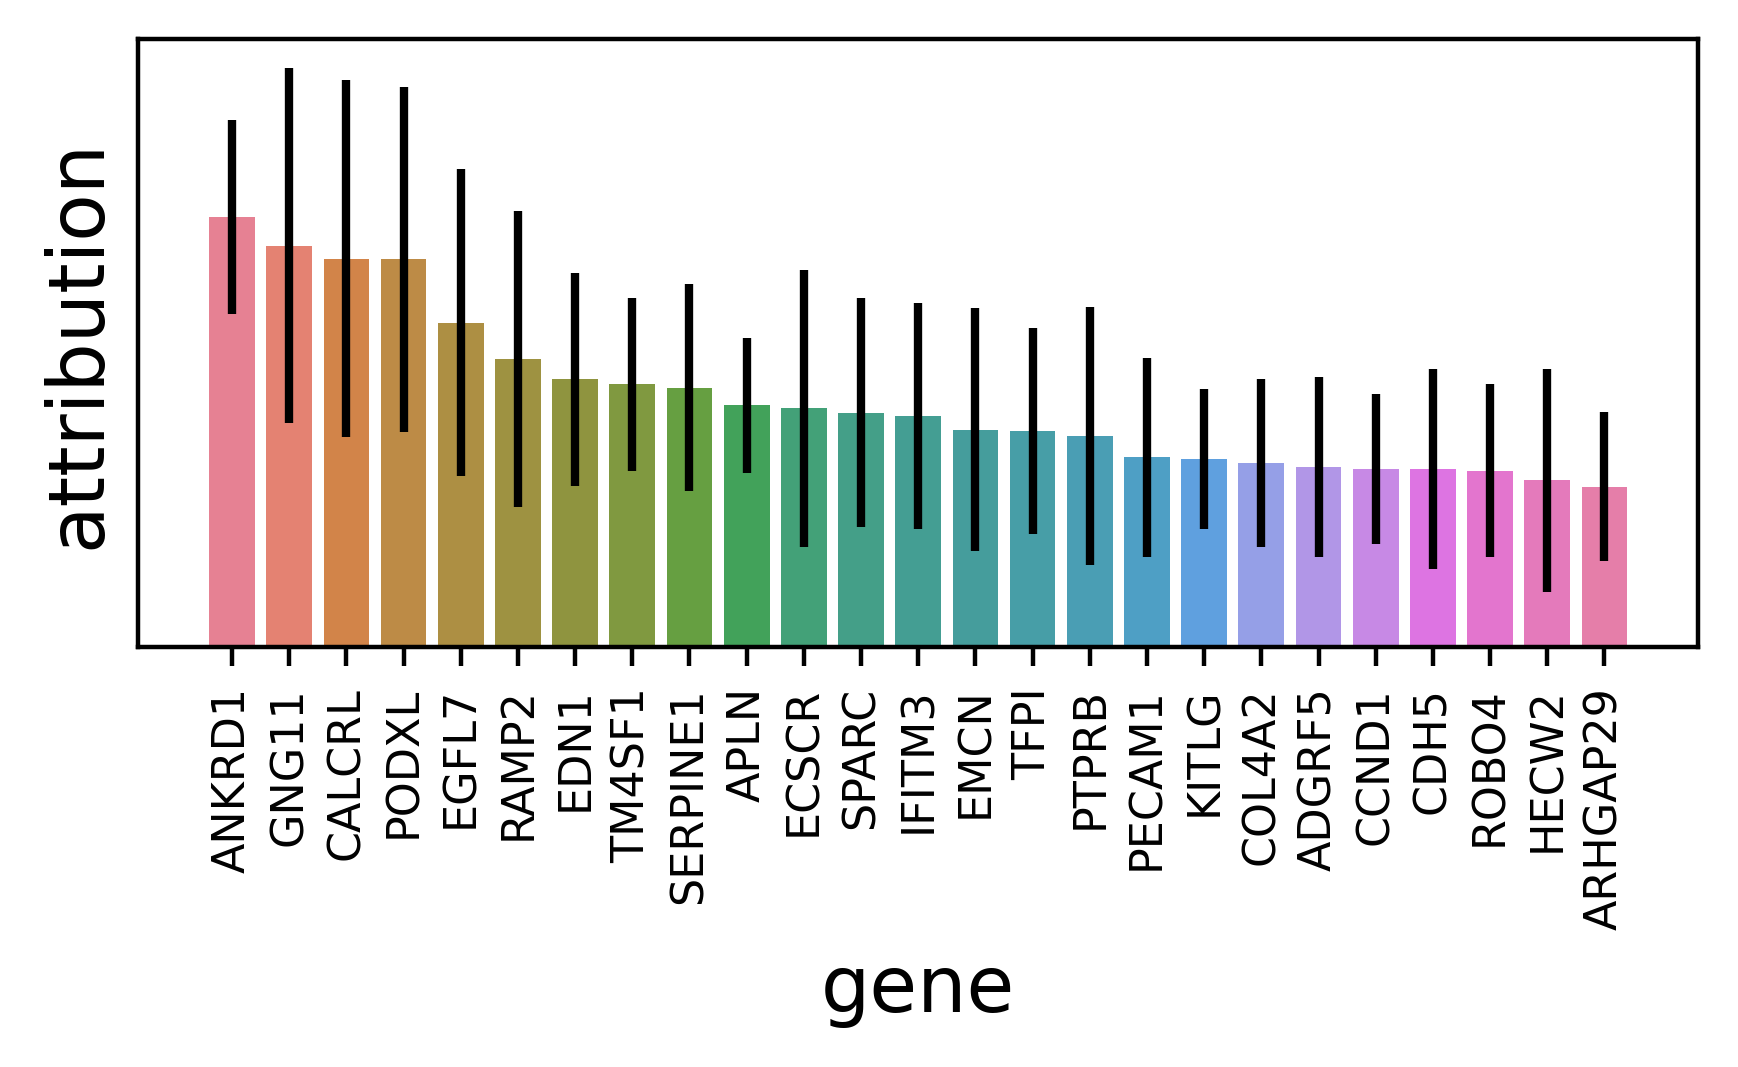

In [16]:
explainer.plot_ranked_genes(attrs_df, n_plot=25)

In [17]:
meta = cq.cell_metadata

In [18]:
# Show a random sampling of 5 annotations
meta.sample(5)

,index,study,sample,prediction,fm_signature_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,prediction_nn_dist,...,cell_line,iPSC-derived,ESC-derived,xenograft,tissue,cell_line_cleaned,disease,FACS_sort,sex_cleaned,author_label
745558,745558,GSE158492,GSM4801679,"CD4-positive, alpha-beta T cell",0.000000,2044.0,8798.0000,132.0,1.500341,8.058608e-03,...,False,False,False,False,spleen,NA,NA,CD4+CD45RA+CD27+CD25-,NA,NA
22906226,22906226,DS000011735,DS000011735-GSM4058913,alveolar macrophage,-0.022506,2122.0,5992.0000,158.0,2.636849,1.360774e-02,...,False,NA,NA,NA,lung,NA,healthy,NA,NA,alveolar macrophage
12577966,12577966,ENCODE,ENCFF463PXH,macrophage,-0.135262,1258.0,2037.9995,6.5,0.318940,1.740629e-02,...,False,False,False,False,placenta,NA,NA,NA,NA,NA
14878503,14878503,b52eb423-5d0d-4645-b217-e1c6d38b2e72,HCAHeart7829976,fibroblast,-0.035549,815.0,1021.0000,1.0,0.097943,0.000000e+00,...,False,NA,NA,NA,right cardiac atrium,NA,healthy,NA,NA,fibroblast
20305271,20305271,436154da-bcf1-4130-9c8b-120ff9a888f2,9245fdfa-904c-4421-ba87-60da990f40ed,"CD4-positive, alpha-beta T cell",0.000000,581.0,2000.0000,36.0,1.800000,1.788139e-07,...,False,NA,NA,NA,blood,NA,healthy,NA,NA,"CD4-positive, alpha-beta T cell"


In [89]:
for i in meta["disease"].value_counts().index:
    print(i)
    

healthy
NA
COVID-19
COVID-19;healthy
systemic lupus erythematosus
Alzheimer's disease
chronic myelogenous leukemia
idiopathic pulmonary fibrosis
dilated cardiomyopathy
Parkinson's Disease
ulcerative colitis
dengue disease
melanoma
basal cell carcinoma
Crohn's disease
B-cell acute lymphoblastic leukemia
lung adenocarcinoma
head and neck squamous cell carcinoma
juvenile idiopathic arthritis
neuroblastoma
hepatocellular carcinoma
multiple sclerosis
B-cell lymphoma
pulmonary fibrosis
mucocutaneous lymph node syndrome
arrhythmogenic right ventricular cardiomyopathy
colorectal cancer
nasopharyngeal neoplasm
esophageal carcinoma
chronic kidney disease
myocardial infarction
multiple myeloma
chronic obstructive pulmonary disease
acute kidney failure
obesity
systemic scleroderma;interstitial lung disease
ovarian serous carcinoma
non-alcoholic steatohepatitis
Uveal Melanoma
atopic eczema
brain glioblastoma
acute myeloid leukemia
scleroderma
adenocarcinoma
prostatic hypertrophy
interstitial lung d

In [83]:
meta['sample'].value_counts()

GSM4367989                                                                                 203435
Figure 1 - A cell atlas of human thymic development defines T cell repertoire formation    184660
GSM5008737                                                                                 161764
GSM4367986                                                                                 108760
TSP14                                                                                      102663
                                                                                            ...  
DS000010618_part_3-N12.EpiB                                                                     2
COVID-19_D12_kidney                                                                             2
DS000010618_part_1-N11.LPB                                                                      2
12523446-ab8b-49bf-a95b-c36414a539d7                                                            2
DS000010357-GSM35117

In [19]:
meta.columns

Index(['index', 'study', 'sample', 'prediction', 'fm_signature_score',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'prediction_nn_dist', 'data_type', 'in_vitro', 'in_vivo', 'ex_vivo',
       'organoid', 'cell_line', 'iPSC-derived', 'ESC-derived', 'xenograft',
       'tissue', 'cell_line_cleaned', 'disease', 'FACS_sort', 'sex_cleaned',
       'author_label'],
      dtype='object')

In [20]:
from scimilarity.ontologies import (
    import_cell_ontology,
    get_id_mapper,
    get_all_descendants,
    get_all_ancestors
)

In [21]:
onto = import_cell_ontology(url="http://purl.obolibrary.org/obo/cl/cl-basic.obo")

In [22]:
id2name = get_id_mapper(onto)

In [23]:
id2name

{'CL:0000000': 'cell',
 'CL:0000001': 'primary cultured cell',
 'CL:0000005': 'neural crest derived fibroblast',
 'CL:0000006': 'neuronal receptor cell',
 'CL:0000007': 'early embryonic cell (metazoa)',
 'CL:0000008': 'migratory cranial neural crest cell',
 'CL:0000010': 'cultured cell',
 'CL:0000011': 'migratory trunk neural crest cell',
 'CL:0000014': 'germ line stem cell',
 'CL:0000015': 'male germ cell',
 'CL:0000016': 'male germ line stem cell',
 'CL:0000017': 'spermatocyte',
 'CL:0000018': 'spermatid',
 'CL:0000019': 'sperm',
 'CL:0000020': 'spermatogonium',
 'CL:0000021': 'female germ cell',
 'CL:0000022': 'female germ line stem cell',
 'CL:0000023': 'oocyte',
 'CL:0000024': 'oogonial cell',
 'CL:0000025': 'egg cell',
 'CL:0000026': 'invertebrate nurse cell',
 'CL:0000027': 'smooth muscle cell neural crest derived',
 'CL:0000028': 'CNS neuron (sensu Nematoda and Protostomia)',
 'CL:0000029': 'neural crest derived neuron',
 'CL:0000030': 'glioblast',
 'CL:0000031': 'neuroblast (s

In [24]:
endo_descendents = get_all_descendants(onto, "CL:0000115", inclusive=True)
endo_descendents

{'CL:0000071',
 'CL:0000115',
 'CL:0000131',
 'CL:0000132',
 'CL:0000666',
 'CL:0000704',
 'CL:0002138',
 'CL:0002139',
 'CL:0002144',
 'CL:0002188',
 'CL:0002262',
 'CL:0002342',
 'CL:0002350',
 'CL:0002367',
 'CL:0002543',
 'CL:0002544',
 'CL:0002545',
 'CL:0002585',
 'CL:0002618',
 'CL:0002651',
 'CL:0002652',
 'CL:0002653',
 'CL:0002671',
 'CL:0008040',
 'CL:0009086',
 'CL:0009092',
 'CL:0009094',
 'CL:0009095',
 'CL:0009107',
 'CL:0009108',
 'CL:0009109',
 'CL:0009110',
 'CL:0009115',
 'CL:0010006',
 'CL:0010008',
 'CL:0011030',
 'CL:0019021',
 'CL:0019022',
 'CL:1000308',
 'CL:1000397',
 'CL:1000398',
 'CL:1000411',
 'CL:1000412',
 'CL:1000413',
 'CL:1000414',
 'CL:1000708',
 'CL:1000892',
 'CL:1001005',
 'CL:1001033',
 'CL:1001036',
 'CL:1001096',
 'CL:1001099',
 'CL:1001123',
 'CL:1001124',
 'CL:1001126',
 'CL:1001127',
 'CL:1001131',
 'CL:1001209',
 'CL:1001210',
 'CL:1001213',
 'CL:1001216',
 'CL:1001220',
 'CL:1001223',
 'CL:1001285',
 'CL:1001286',
 'CL:1001287',
 'CL:10015

In [25]:
import numpy as np
import pandas as pd

In [26]:
np.size(endo_descendents)

1

In [27]:
endochildren = [id2name[x] for x in endo_descendents]

In [28]:
endochildren

['squamous endothelial cell of venule',
 'endothelial cell of high endothelial venule',
 'endothelial cell of lymphatic vessel',
 'inner medulla vasa recta ascending limb cell',
 'vasa recta descending limb cell',
 'thoracic aorta endothelial cell',
 'endothelial cell',
 'endothelial cell of efferent lymphatic vessel',
 'aortic endothelial cell',
 'vasa recta ascending limb cell',
 'endothelial cell of respiratory system lymphatic vessel',
 "endothelial cell of Peyer's patch",
 'dermis blood vessel endothelial cell',
 'vein endothelial cell',
 'peritubular capillary endothelial cell',
 'alveolar capillary type 2 endothelial cell',
 'outer renal medulla vasa recta cell',
 'endothelial cell of venous sinus of spleen',
 'cerebral cortex endothelial cell',
 'mammary microvascular endothelial cell',
 'endothelial cell of artery',
 'endothelial cell of umbilical vein',
 'alveolar capillary type 1 endothelial cell',
 'lymphatic endothelial cell of trabecula',
 'endocardial cell',
 'endothelia

In [29]:
endo_ancestors = get_all_ancestors(onto, "CL:0000115", inclusive=True)
endo_ancestors

{'CL:0000000',
 'CL:0000115',
 'CL:0000213',
 'CL:0000215',
 'CL:0000222',
 'CL:0002321'}

In [267]:
# id2name['https://orcid.org/0000-0003-1980-3228']

In [30]:
endo_ids = pd.Index(endo_descendents)
endo_cell_types = endo_ids.map(id2name)

In [31]:
meta.columns

Index(['index', 'study', 'sample', 'prediction', 'fm_signature_score',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'prediction_nn_dist', 'data_type', 'in_vitro', 'in_vivo', 'ex_vivo',
       'organoid', 'cell_line', 'iPSC-derived', 'ESC-derived', 'xenograft',
       'tissue', 'cell_line_cleaned', 'disease', 'FACS_sort', 'sex_cleaned',
       'author_label'],
      dtype='object')

In [32]:
meta['author_label'].value_counts()

NA                                              14078941
classical monocyte                                535849
CD4-positive, alpha-beta T cell                   531157
CD8-positive, alpha-beta T cell                   399243
cardiac muscle cell                               326640
                                                  ...   
retinal pigment epithelial cell                      317
intestinal tuft cell                                 298
CD141-positive myeloid dendritic cell                292
myeloid dendritic cell, human                        170
paneth cell of epithelium of small intestine          90
Name: author_label, Length: 203, dtype: int64

In [33]:
meta['sample'].value_counts()

GSM4367989                                                                                 203435
Figure 1 - A cell atlas of human thymic development defines T cell repertoire formation    184660
GSM5008737                                                                                 161764
GSM4367986                                                                                 108760
TSP14                                                                                      102663
                                                                                            ...  
DS000010618_part_3-N12.EpiB                                                                     2
COVID-19_D12_kidney                                                                             2
DS000010618_part_1-N11.LPB                                                                      2
12523446-ab8b-49bf-a95b-c36414a539d7                                                            2
DS000010357-GSM35117

In [34]:
samplelist = list(meta['tissue'].value_counts().index)
len(meta[meta['tissue'].isin([s for s in samplelist if 'lung' in s])]['study'].value_counts().index)

41

In [35]:
endo_inds = meta.prediction.isin(endo_cell_types)
endo_meta = meta[endo_inds]

In [36]:
%%time
endo_embeddings = cq.get_precomputed_embeddings(np.where(endo_inds)[0])
endo_embeddings.shape

CPU times: user 49 s, sys: 8.55 s, total: 57.6 s
Wall time: 3.87 s


(1121815, 128)

In [37]:
mac_distances = 1 - (endo_embeddings @ avg_embedding.T).flatten()

endo_meta["distance"] = mac_distances
endo_meta["similarity"] = 1 / mac_distances

endo_meta["sample"] = pd.Categorical(endo_meta["sample"])

In [38]:
cell_counts_per_sample = endo_meta.groupby("sample").size()
samples_w_enough_cells = cell_counts_per_sample[cell_counts_per_sample > 25].index
endo_meta = endo_meta[endo_meta["sample"].isin(samples_w_enough_cells)]
endo_meta["sample"] = endo_meta["sample"].cat.remove_unused_categories()

In [39]:
import seaborn as sns
from matplotlib import pyplot as plt

In [40]:
endo_meta

,index,study,sample,prediction,fm_signature_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,prediction_nn_dist,...,ESC-derived,xenograft,tissue,cell_line_cleaned,disease,FACS_sort,sex_cleaned,author_label,distance,similarity
12230,12230,GSE163278,GSM4976512,endothelial cell of vascular tree,-0.008421,881.0,2339.0,69.0,2.949979,0.008914,...,False,False,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.159093,6.285621
12237,12237,GSE163278,GSM4976512,endothelial cell of vascular tree,-0.008780,880.0,2089.0,42.0,2.010531,0.008054,...,False,False,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.179747,5.563379
12255,12255,GSE163278,GSM4976512,endothelial cell of vascular tree,0.000000,833.0,1661.0,48.0,2.889825,0.010211,...,False,False,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.182990,5.464772
12260,12260,GSE163278,GSM4976512,blood vessel endothelial cell,0.000000,683.0,1578.0,61.0,3.865653,0.007658,...,False,False,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.189526,5.276320
12265,12265,GSE163278,GSM4976512,blood vessel endothelial cell,-0.008561,1075.0,2244.0,67.0,2.985740,0.008886,...,False,False,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.158813,6.296714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266161,23266161,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,endothelial cell of vascular tree,-0.056753,887.0,1102.0,3.0,0.272232,0.022374,...,NA,NA,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.162486,6.154365
23266162,23266162,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,capillary endothelial cell,0.441763,522.0,599.0,0.0,0.000000,0.013321,...,NA,NA,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.153269,6.524462
23266163,23266163,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,capillary endothelial cell,-0.027806,548.0,635.0,0.0,0.000000,0.013577,...,NA,NA,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.084049,11.897806
23266164,23266164,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,endothelial cell of lymphatic vessel,-0.046867,813.0,1019.0,0.0,0.000000,0.006363,...,NA,NA,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.153927,6.496567


In [41]:
endo_meta['sample'].value_counts()

GSM4006844                    15579
GSM4006843                    11201
GSM4006846                    11138
TSP2                           9098
GSM3535276                     8483
                              ...  
DS000011731-GSM4944147           26
COVID-19_D7_liver                26
GSM4721950                       26
GSM4466783                       26
DS000010618_part_2-N18.LPB       26
Name: sample, Length: 1610, dtype: int64

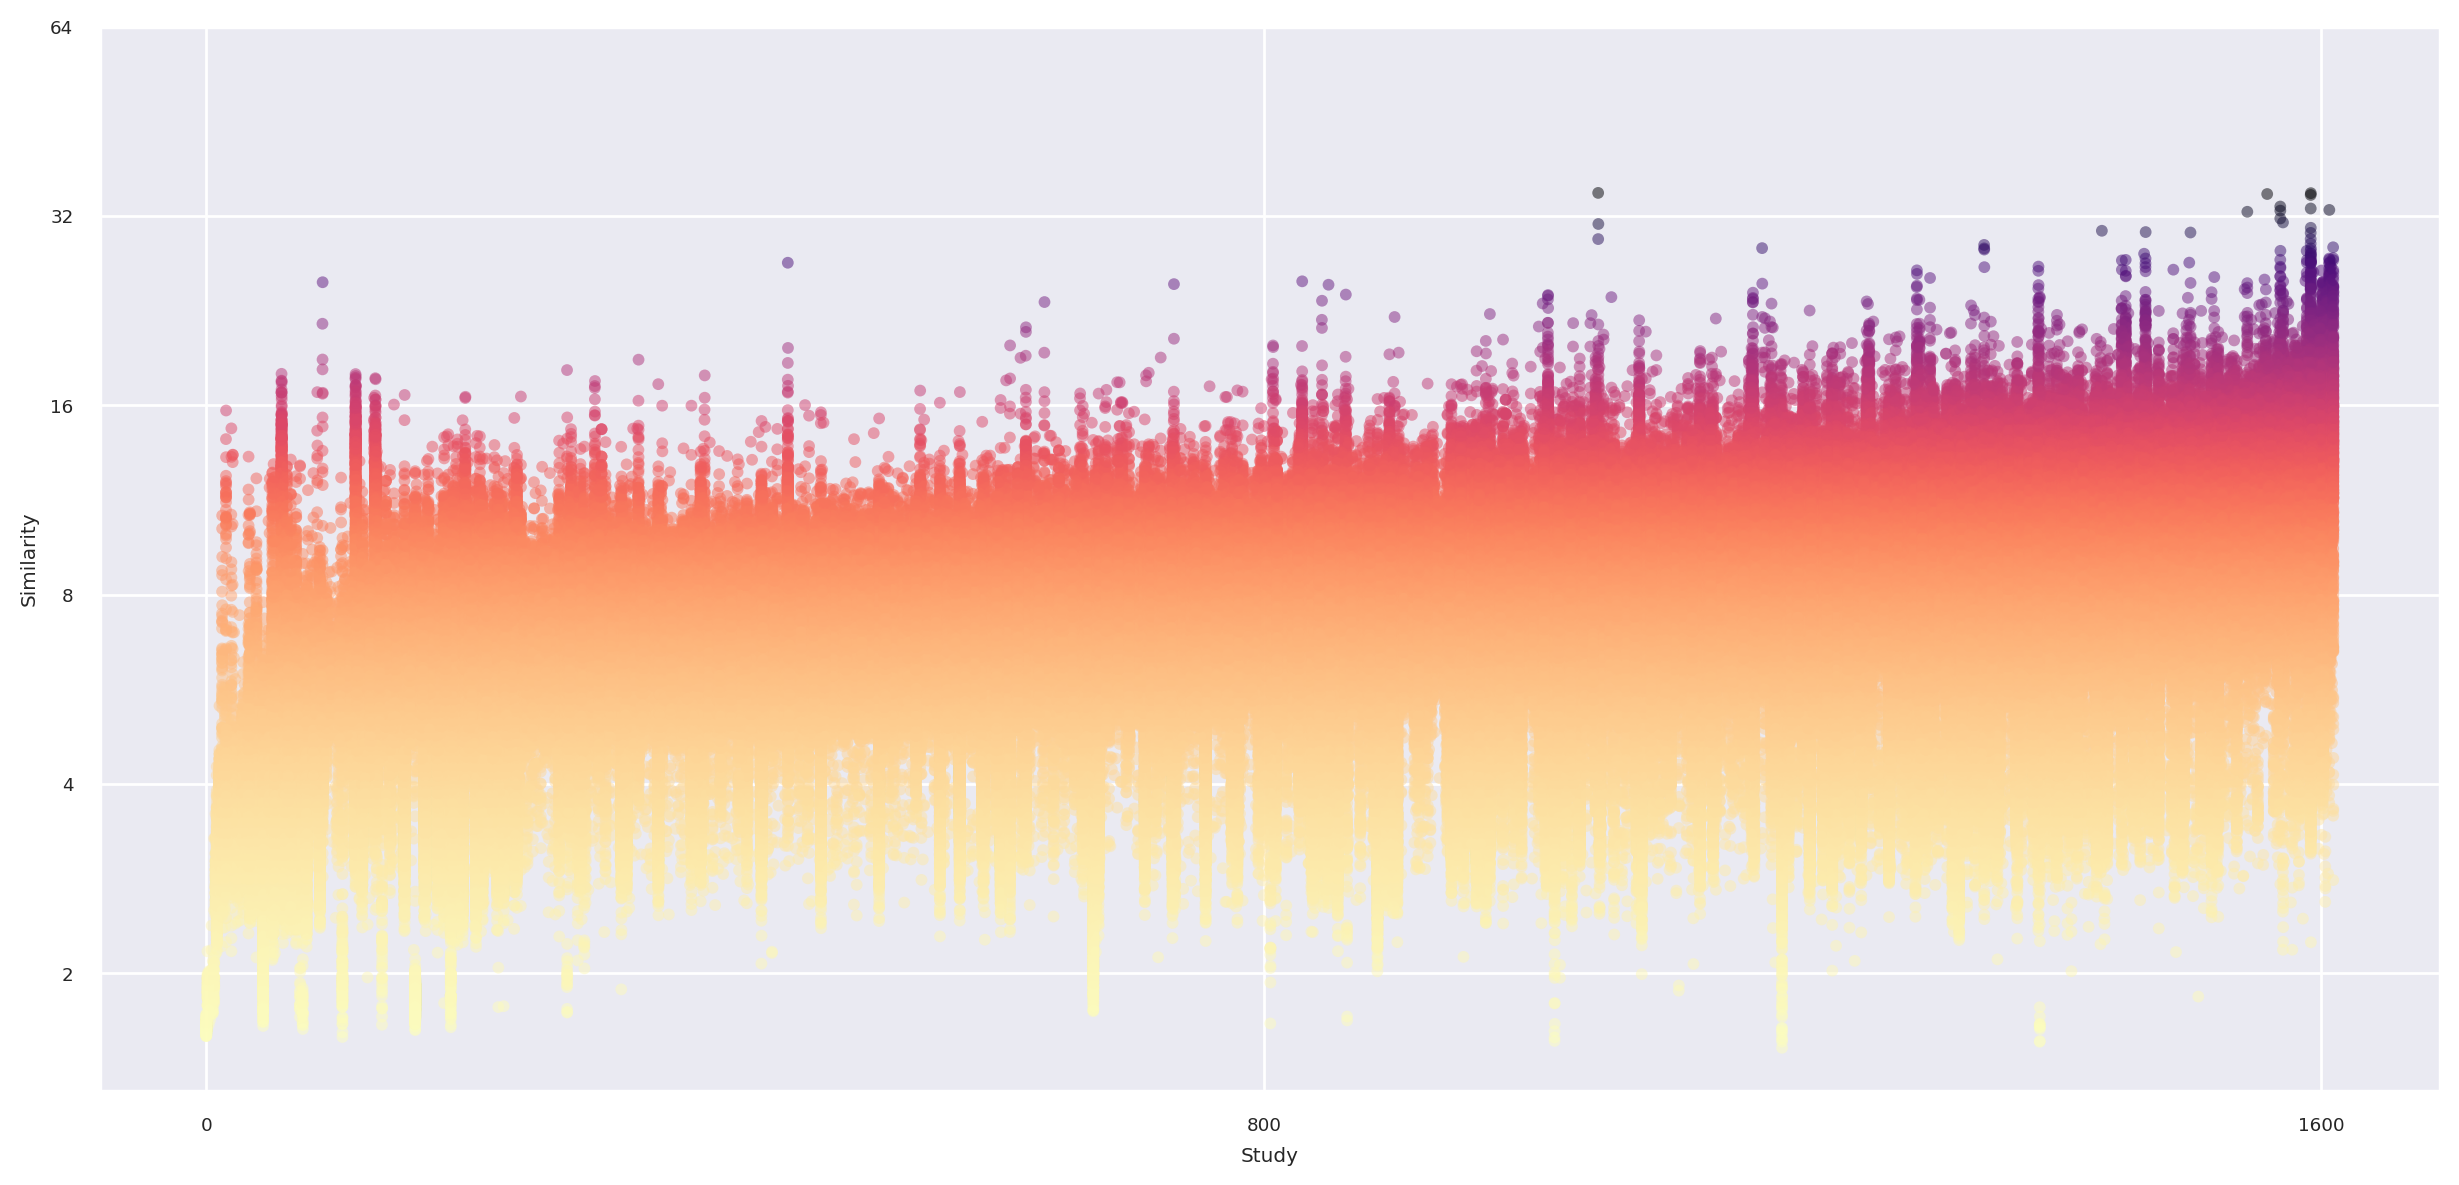

In [74]:
# Disclaimer: this is a somewhat hacky workaround to add jitter to seaborn's scatterplot().
# While stripplot() can do this natively, it's much more resource-hungry.

# 1. Order the categories on the x-axis
sample_order = list(
    endo_meta.groupby("sample")["similarity"].quantile(0.9).sort_values().index
)
endo_meta["sample"] = pd.Categorical(
    endo_meta["sample"], categories=sample_order, ordered=True
)

# 2. Transform the categorical data into numerical values
endo_meta["numeric_sample"] = endo_meta["sample"].cat.codes

# 3. Add jitter (Add more or less jitter depending on the plot by adjust the jitter strength)
jitter_strength = 0.1
endo_meta["jittered_sample"] = endo_meta["numeric_sample"] + np.random.uniform(
    -jitter_strength, jitter_strength, size=len(endo_meta)
)

# 4. Now, plot using the jittered values
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(15, 7))
ax = sns.scatterplot(
    data=endo_meta,
    x="jittered_sample",
    y="similarity",
    hue="similarity",
    palette="magma_r",
    linewidth=0,
    size=0.1,
    alpha=0.5,
)

ax.set_yscale("log", base=2)
ax.legend().set_visible(False)
ax.set_yticks([2, 4, 8, 16, 32, 64])
ax.set_yticklabels(["2", "4", "8", "16", "32", "64"])
ax.set_ylabel("Similarity")

# Set the x-ticks based on the desired order
ax.set_xticks([0, 800, 1600])
ax.set_xticklabels(["0", "800", "1600"])
ax.set_xlabel("Study")

fig.savefig("output_scimilarity_studies.png", format = "png", dpi = 1200, bbox_inches = "tight")

In [48]:
sample_order

['1b360d98-1fab-4b57-9a33-600061bc968a',
 'GSM4090784',
 'GSM4577080',
 'GSM4090787',
 'GSM4970298',
 'GSM4090785',
 'GSM4970299',
 'GSM4367988',
 'GSM4367989',
 'GSM3730316',
 'GSM5014870',
 'GSM3910568',
 'ENCFF460NTJ',
 'GSM5082098',
 'GSM3910567',
 'COVID-19_D13_liver',
 'GSM5082097',
 'GSM3730314',
 'GSM4721950',
 'COVID-19_D14_liver',
 'GSM3523349',
 'GSM4988048',
 'GSM3910569',
 'GSM4632828',
 'GSM4272587',
 'GSM3755690',
 'GSM4272583',
 'GSM5014869',
 'GSM3910563',
 'GSM4632827',
 'GSM3910561',
 'GSM4272584',
 'COVID-19_D16_liver',
 'ENCFF707EOQ',
 'GSM3755698',
 'GSM4632826',
 'GSM4238689',
 'GSM4064146',
 'ENCFF589LJM',
 'GSM4632823',
 'GSM4632825',
 'GSM4632824',
 'GSM4721948',
 'ENCFF282MIQ',
 'GSM4774853',
 'GSM4592552',
 'GSM4844619',
 'GSM4654669',
 'COVID-19_D5_liver',
 'GSM4684557',
 'ENCFF317AUE',
 'C41_NST',
 'COVID-19_D17_liver',
 'GSM3323825',
 'GSM4721949',
 'D354_Biop_Pro1',
 'GSM4995545',
 'ENCFF924UWY',
 'ENCFF606RKE',
 'COVID-19_D2_heart',
 '1.7',
 'C41_CST',


In [49]:
max_similarity = [np.max(endo_meta.loc[endo_meta["sample"] == x]['similarity']) for x in sample_order]

In [50]:
max_similarity

[1.7239957,
 2.167907,
 2.0161176,
 2.0156658,
 2.3822522,
 2.0909805,
 3.278272,
 3.5880969,
 4.261771,
 3.5245385,
 5.3250422,
 4.3100724,
 10.686111,
 4.8481064,
 6.4432244,
 15.694999,
 4.568966,
 4.4238462,
 4.437977,
 14.701909,
 13.352553,
 6.968735,
 5.873351,
 4.50761,
 4.8391123,
 7.42113,
 5.5210114,
 5.35363,
 6.249575,
 5.763467,
 4.787633,
 4.9021516,
 13.256396,
 10.811399,
 5.2168984,
 6.857772,
 5.777276,
 5.3571754,
 12.242113,
 5.0804577,
 5.346696,
 5.6053576,
 6.300677,
 7.7822466,
 7.3330646,
 6.356711,
 6.1036067,
 10.475101,
 12.2208185,
 5.99334,
 12.506935,
 12.89926,
 12.305813,
 6.9179544,
 7.4105883,
 8.239044,
 7.707475,
 17.950073,
 12.018545,
 6.795215,
 9.537083,
 12.798223,
 6.3489676,
 7.8537483,
 13.114884,
 7.921239,
 8.526976,
 8.385095,
 12.344085,
 8.04061,
 8.223682,
 12.837757,
 8.013906,
 9.285823,
 6.413907,
 7.964661,
 9.917805,
 11.725497,
 7.6640067,
 8.735536,
 9.913925,
 12.481617,
 9.003637,
 8.02402,
 16.784903,
 7.818098,
 9.519403,
 

In [51]:
similarity_df = pd.DataFrame(data = {'sample' : sample_order, 'max_similarity' : max_similarity})

In [52]:
similarity_df

,sample,max_similarity
0,1b360d98-1fab-4b57-9a33-600061bc968a,1.723996
1,GSM4090784,2.167907
2,GSM4577080,2.016118
3,GSM4090787,2.015666
4,GSM4970298,2.382252
...,...,...
1605,GSM4983790,20.988441
1606,GSM3666104,32.704254
1607,GSM3814888,27.078194
1608,GSM4756815,24.670708


In [53]:
similarity_df = similarity_df.sort_values('max_similarity', ascending=False)

In [54]:
similarity_df

,sample,max_similarity
1053,GSM3909675,34.806850
1592,ENCFF143NAV,34.775467
1559,31-10042,34.665676
1569,GSM3666106,33.112057
1606,GSM3666104,32.704254
...,...,...
1,GSM4090784,2.167907
5,GSM4090785,2.090981
2,GSM4577080,2.016118
3,GSM4090787,2.015666


In [55]:
similarity_df_top100 = similarity_df[:100]

In [56]:
similarity_df_top100

,sample,max_similarity
1053,GSM3909675,34.806850
1592,ENCFF143NAV,34.775467
1559,31-10042,34.665676
1569,GSM3666106,33.112057
1606,GSM3666104,32.704254
...,...,...
1419,GSM3666108,21.123158
1309,GSM4654766,21.102196
1556,COVID-19_D4_lung,21.061850
1605,GSM4983790,20.988441


In [57]:
similarity_df_top100['sample'].value_counts()

GSM3909675        1
Sample1162-EO1    1
29-10008          1
GSM4830979        1
GSM3489197        1
                 ..
GSM4557981        1
GSM4339776        1
GSM4904137        1
34-10050          1
29-10011          1
Name: sample, Length: 100, dtype: int64

In [58]:
endo_meta

,index,study,sample,prediction,fm_signature_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,prediction_nn_dist,...,tissue,cell_line_cleaned,disease,FACS_sort,sex_cleaned,author_label,distance,similarity,numeric_sample,jittered_sample
12230,12230,GSE163278,GSM4976512,endothelial cell of vascular tree,-0.008421,881.0,2339.0,69.0,2.949979,0.008914,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.159093,6.285621,170,169.919221
12237,12237,GSE163278,GSM4976512,endothelial cell of vascular tree,-0.008780,880.0,2089.0,42.0,2.010531,0.008054,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.179747,5.563379,170,170.067436
12255,12255,GSE163278,GSM4976512,endothelial cell of vascular tree,0.000000,833.0,1661.0,48.0,2.889825,0.010211,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.182990,5.464772,170,169.973960
12260,12260,GSE163278,GSM4976512,blood vessel endothelial cell,0.000000,683.0,1578.0,61.0,3.865653,0.007658,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.189526,5.276320,170,170.037394
12265,12265,GSE163278,GSM4976512,blood vessel endothelial cell,-0.008561,1075.0,2244.0,67.0,2.985740,0.008886,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.158813,6.296714,170,170.037056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266161,23266161,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,endothelial cell of vascular tree,-0.056753,887.0,1102.0,3.0,0.272232,0.022374,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.162486,6.154365,1104,1104.033232
23266162,23266162,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,capillary endothelial cell,0.441763,522.0,599.0,0.0,0.000000,0.013321,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.153269,6.524462,1104,1103.990275
23266163,23266163,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,capillary endothelial cell,-0.027806,548.0,635.0,0.0,0.000000,0.013577,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.084049,11.897806,1104,1104.096902
23266164,23266164,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,endothelial cell of lymphatic vessel,-0.046867,813.0,1019.0,0.0,0.000000,0.006363,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.153927,6.496567,1104,1103.904261


In [59]:
list(similarity_df_top100['sample'])

['GSM3909675',
 'ENCFF143NAV',
 '31-10042',
 'GSM3666106',
 'GSM3666104',
 'GSM3909673',
 'GSM4668832',
 'GSM4516281',
 'GSM4827161',
 'GSM4827160',
 'ENCFF904BER',
 'COVID-19_D12_2_lung',
 'GSM3489191',
 'GSM3489195',
 'DS000011735-GSM4058951',
 'GSM4827193',
 'ENCFF359TAG',
 'GSM3814888',
 'DS000011735-GSM4058974',
 'TSP14',
 'ENCFF415KNH',
 'DS000011735-GSM4058901',
 'GSM4792476',
 'GSM3666103',
 'GSM4697651',
 'GSM4827191',
 'GSM4143262',
 '34-10050',
 'GSM4904137',
 'GSM4339776',
 'GSM4557981',
 'GSM4983457',
 'GSM4792472',
 'ENCFF459HJH',
 'GSM4756815',
 '826d0c76-20b0-47df-94c2-d4506445591b',
 'TSP4',
 'GSM3814889',
 'ENCFF313RZL',
 'GSM4339778',
 'GSM4827175',
 'GSM4827171',
 'GSM4756818',
 'ENCFF831OBZ',
 'GSM3489187',
 'GSM4626764',
 'GSM4827159',
 'GSM4827170',
 'GSM4143261',
 'Sample1153-EO1',
 'GSM3666105',
 'GSM3660658',
 'TSP10',
 'GSM4577306',
 'GSM4143263',
 'GSM4577314',
 'GSM4577313',
 'GSM4339777',
 '29-10013',
 'ENCFF802HTG',
 'GSM5602328',
 'GSM4774936',
 'GSM5602

In [60]:
endo_meta_filtered = endo_meta[endo_meta['sample'].isin(list(similarity_df_top100['sample']))].reset_index(drop=True)

In [61]:
endo_meta_filtered

,index,study,sample,prediction,fm_signature_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,prediction_nn_dist,...,tissue,cell_line_cleaned,disease,FACS_sort,sex_cleaned,author_label,distance,similarity,numeric_sample,jittered_sample
0,336364,GSE157157,GSM4756815,capillary endothelial cell,-0.276765,3356.0,11761.0,411.0,3.494601,0.028352,...,NA,NA,healthy,NA,NA,NA,0.055330,18.073423,1608,1607.977435
1,336388,GSE157157,GSM4756815,capillary endothelial cell,-0.153054,3642.0,21248.0,480.0,2.259036,0.026978,...,NA,NA,healthy,NA,NA,NA,0.115585,8.651670,1608,1607.974074
2,336408,GSE157157,GSM4756815,capillary endothelial cell,-0.120912,4607.0,20953.0,924.0,4.409870,0.026332,...,NA,NA,healthy,NA,NA,NA,0.044025,22.714611,1608,1608.009506
3,336449,GSE157157,GSM4756815,endothelial cell of lymphatic vessel,0.085110,5927.0,41983.0,1385.0,3.298954,0.078675,...,NA,NA,healthy,NA,NA,NA,0.177353,5.638468,1608,1607.936815
4,336488,GSE157157,GSM4756815,endothelial cell of lymphatic vessel,-0.197349,1617.0,5167.0,5.0,0.096768,0.040858,...,NA,NA,healthy,NA,NA,NA,0.133877,7.469564,1608,1607.981023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144288,23175739,DS000011735,DS000011735-GSM4058966,endothelial cell of vascular tree,-0.314651,2242.0,5223.0,195.0,3.733487,0.015823,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,lung endothelial cell,0.108836,9.188162,1454,1454.072004
144289,23175753,DS000011735,DS000011735-GSM4058966,capillary endothelial cell,-0.187844,1089.0,1873.0,30.0,1.601708,0.018185,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,capillary endothelial cell,0.079503,12.578170,1454,1453.905536
144290,23175760,DS000011735,DS000011735-GSM4058966,endothelial cell of vascular tree,-0.203305,679.0,1275.0,120.0,9.411765,0.019793,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,lung endothelial cell,0.134055,7.459597,1454,1453.937361
144291,23175779,DS000011735,DS000011735-GSM4058966,endothelial cell of vascular tree,-0.338711,3080.0,9216.0,185.0,2.007378,0.016211,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,lung endothelial cell,0.087251,11.461170,1454,1454.054457


In [62]:
endo_meta_filtered['sample'].cat.remove_unused_categories(inplace=True)

In [63]:
endo_meta_filtered['sample'].value_counts()

TSP2          9098
GSM4557981    7335
GSM4339776    7271
GSM4339775    6649
GSM4339780    5283
              ... 
GSM4904137      55
GSM6106343      44
31-10042        39
34-10187        29
GSM4983790      27
Name: sample, Length: 100, dtype: int64

In [64]:
list(endo_meta_filtered['study'].value_counts().index)

['GSE145927',
 'GSE159354',
 'ENCODE',
 'e5f58829-1a66-40b5-a624-9046778e74f5',
 'GSE158127',
 'GSE150741',
 'GSE138979',
 'GSE131736',
 'GSE139534',
 'b52eb423-5d0d-4645-b217-e1c6d38b2e72',
 'GSE128169',
 'GSE184950',
 'GSE146512',
 'DS000011665',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'DS000011735',
 'covid',
 'GSE122960',
 '32f2fd23-ec74-486f-9544-e5b2f41725f5',
 'GSE157783',
 'GSE128033',
 '625f6bf4-2f33-4942-962e-35243d284837',
 'GSE163650',
 'GSE153819',
 'GSE132771',
 'a98b828a-622a-483a-80e0-15703678befd',
 'GSE157157',
 'GSE155226',
 'GSE149878',
 'GSE159491',
 'GSE152805',
 'GSE161266',
 'GSE202210',
 'GSE163678']

In [65]:
endo_meta_filtered['sample']

0                     GSM4756815
1                     GSM4756815
2                     GSM4756815
3                     GSM4756815
4                     GSM4756815
                   ...          
144288    DS000011735-GSM4058966
144289    DS000011735-GSM4058966
144290    DS000011735-GSM4058966
144291    DS000011735-GSM4058966
144292    DS000011735-GSM4058966
Name: sample, Length: 144293, dtype: category
Categories (100, object): ['GSM4983457' < 'TSP14' < 'TSP2' < 'GSM3666105' ... 'GSM3666104' < 'GSM3814888' < 'GSM4756815' < 'COVID-19_D12_2_lung']

In [66]:
len(sample_order)

1610

In [67]:
list(
    endo_meta_filtered.groupby("sample")["similarity"].quantile(0.9).sort_values().index
)

['GSM4983457',
 'TSP14',
 'TSP2',
 'GSM3666105',
 'GSM4792472',
 'GSM4339776',
 'GSM4827170',
 'ENCFF459HJH',
 'GSM4827175',
 'GSM3489197',
 'ENCFF546SAM',
 'TSP6',
 'GSM3660658',
 'GSM4827171',
 'DS000011665_part_6-A32 (411C)',
 'DS000011665_part_1-A32 (411C)',
 'HCAHeart7905328',
 'GSM3909675',
 'GSM3489187',
 'GSM4339780',
 '32-10003',
 'GSM4339778',
 'GSM3489191',
 '29-10008',
 '4861STDY7771115',
 'TSP10',
 'D231',
 'ENCFF802HTG',
 'GSM4143261',
 'GSM4143263',
 'GSM4339775',
 'GSM3891627',
 'GSM4792476',
 'GSM4827159',
 'GSM4143262',
 'GSM4654766',
 'GSM4339777',
 '29-10013',
 'ENCFF289QCB',
 'ENCFF904BER',
 'GSM4125590',
 'ENCFF415KNH',
 'ENCFF831OBZ',
 'DS000011735-GSM4058960',
 'GSM5602319',
 '29-10012',
 '29-10011',
 'GSM3666108',
 'GSM4516281',
 'GSM4827195',
 'ENCFF359TAG',
 'GSM4827193',
 'DS000011735-GSM4058966',
 'DS000011735-GSM4058951',
 'GSM4827161',
 'GSM5602320',
 'DS000011735-GSM4058901',
 'GSM5602338',
 'GSM4125583',
 'GSM4626764',
 'DS000011735-GSM4058974',
 'GSM48

In [68]:
list(
    endo_meta_filtered.groupby("study")["similarity"].quantile(0.9).sort_values().index
)[::-1]

['GSE157157',
 'GSE131736',
 'GSE163678',
 'GSE150741',
 'GSE159491',
 'GSE157783',
 'covid',
 'GSE202210',
 'GSE155226',
 'GSE161266',
 'GSE146512',
 'a98b828a-622a-483a-80e0-15703678befd',
 '625f6bf4-2f33-4942-962e-35243d284837',
 'GSE128169',
 '32f2fd23-ec74-486f-9544-e5b2f41725f5',
 'GSE152805',
 'DS000011735',
 'GSE184950',
 'GSE122960',
 'GSE149878',
 'GSE138979',
 'ENCODE',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'GSE159354',
 'GSE153819',
 'GSE139534',
 'GSE132771',
 'GSE145927',
 'GSE158127',
 'b52eb423-5d0d-4645-b217-e1c6d38b2e72',
 'DS000011665',
 'GSE128033',
 'e5f58829-1a66-40b5-a624-9046778e74f5',
 'GSE163650']

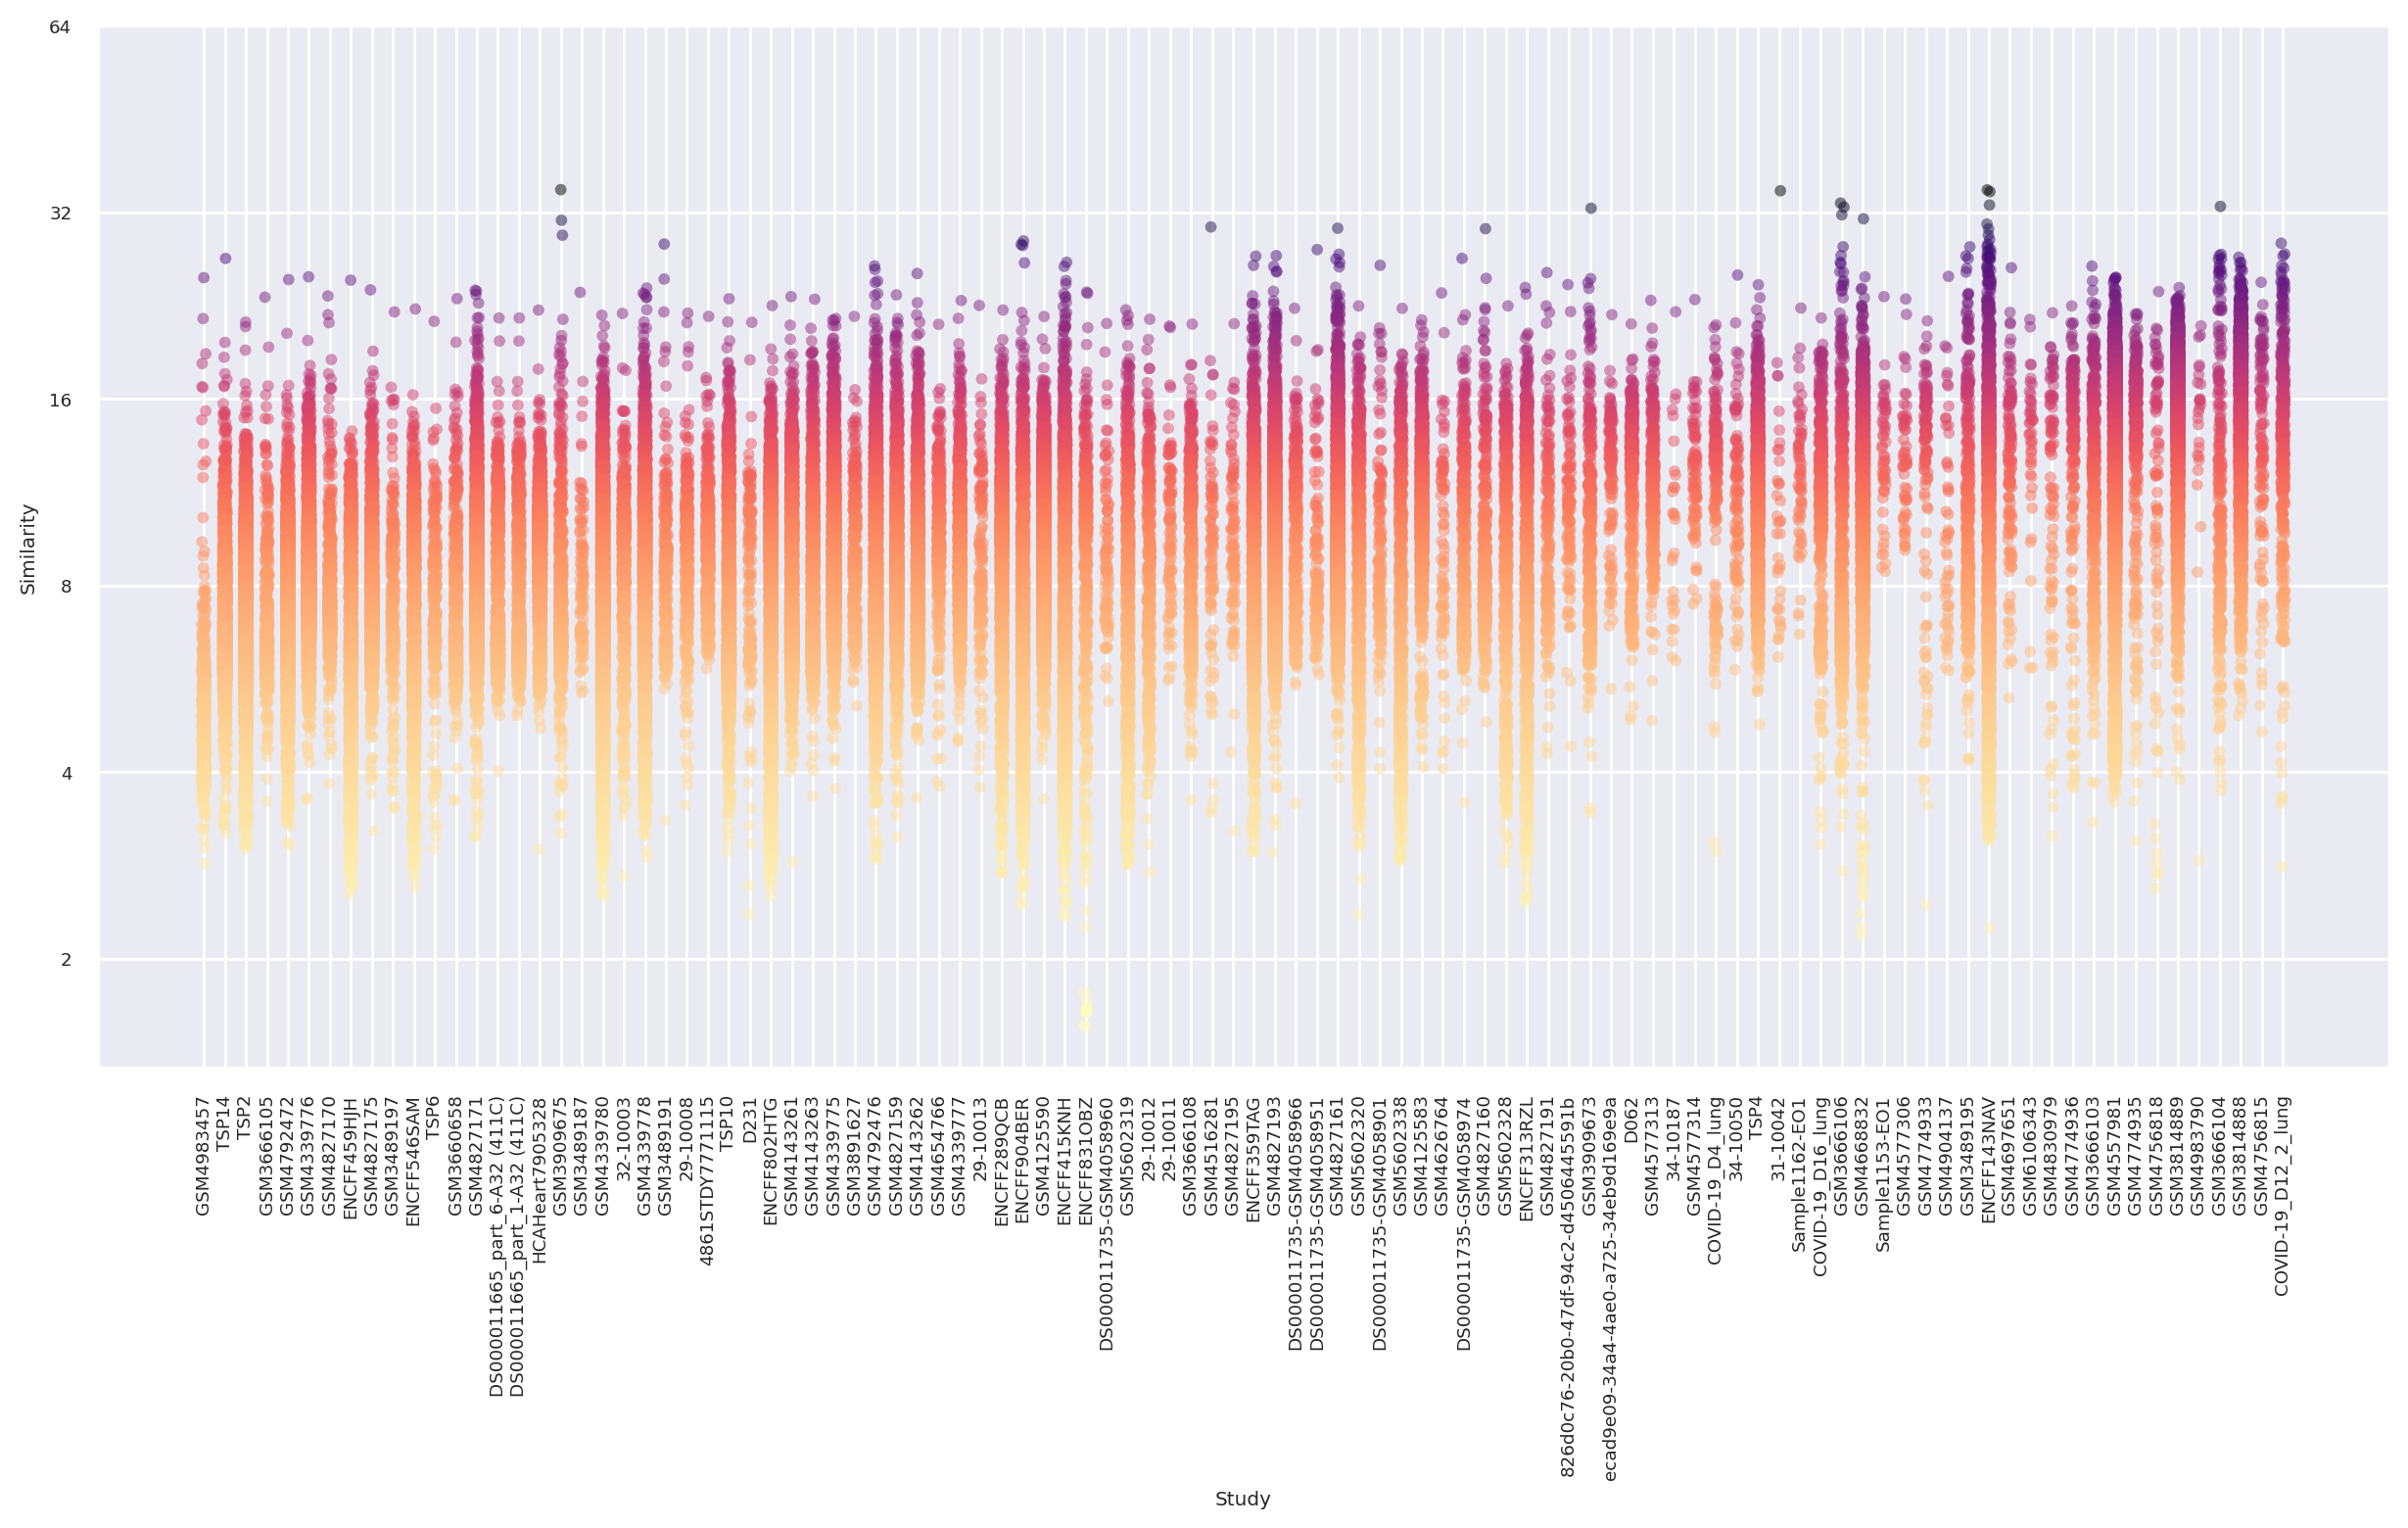

In [78]:
# Disclaimer: this is a somewhat hacky workaround to add jitter to seaborn's scatterplot().
# While stripplot() can do this natively, it's much more resource-hungry.

# 1. Order the categories on the x-axis
sample_order = list(
    endo_meta_filtered.groupby("sample")["similarity"].quantile(0.9).sort_values().index
)
endo_meta_filtered["sample"] = pd.Categorical(
    endo_meta_filtered["sample"], categories=sample_order, ordered=True
)

# 2. Transform the categorical data into numerical values
endo_meta_filtered["numeric_sample"] = endo_meta_filtered["sample"].cat.codes

# 3. Add jitter (Add more or less jitter depending on the plot by adjust the jitter strength)
jitter_strength = 0.1
endo_meta_filtered["jittered_sample"] = endo_meta_filtered["numeric_sample"] + np.random.uniform(
    -jitter_strength, jitter_strength, size=len(endo_meta_filtered)
)

# 4. Now, plot using the jittered values
sns.set(font_scale=0.6)
fig = plt.figure(figsize=(15, 7))
ax = sns.scatterplot(
    data=endo_meta_filtered,
    x="jittered_sample",
    # x="study",

    y="similarity",
    hue="similarity",
    # palette="viridis",
    palette="magma_r",
    linewidth=0,
    size=0.1,
    alpha=0.5,
)

ax.set_yscale("log", base=2)
ax.legend().set_visible(False)
ax.set_yticks([2, 4, 8, 16, 32, 64])
ax.set_yticklabels(["2", "4", "8", "16", "32", "64"])
ax.set_ylabel("Similarity")

# Set the x-ticks based on the desired order
ax.set_xticks(range(len(sample_order)))
ax.set_xticklabels(sample_order, rotation=90)
ax.set_xlabel("Study")

fig.savefig("output_scimilarity_studies100.png", format = "png", dpi = 1200, bbox_inches = "tight")

In [201]:
endo_meta_filtered

,index,study,sample,prediction,fm_signature_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,prediction_nn_dist,...,tissue,cell_line_cleaned,disease,FACS_sort,sex_cleaned,author_label,distance,similarity,numeric_sample,jittered_sample
0,336364,GSE157157,GSM4756815,capillary endothelial cell,-0.276765,3356.0,11761.0,411.0,3.494601,0.028352,...,NA,NA,healthy,NA,NA,NA,0.055330,18.073423,98,98.042591
1,336388,GSE157157,GSM4756815,capillary endothelial cell,-0.153054,3642.0,21248.0,480.0,2.259036,0.026978,...,NA,NA,healthy,NA,NA,NA,0.115585,8.651670,98,97.931153
2,336408,GSE157157,GSM4756815,capillary endothelial cell,-0.120912,4607.0,20953.0,924.0,4.409870,0.026332,...,NA,NA,healthy,NA,NA,NA,0.044025,22.714611,98,97.983553
3,336449,GSE157157,GSM4756815,endothelial cell of lymphatic vessel,0.085110,5927.0,41983.0,1385.0,3.298954,0.078675,...,NA,NA,healthy,NA,NA,NA,0.177353,5.638468,98,98.071290
4,336488,GSE157157,GSM4756815,endothelial cell of lymphatic vessel,-0.197349,1617.0,5167.0,5.0,0.096768,0.040858,...,NA,NA,healthy,NA,NA,NA,0.133877,7.469564,98,98.003001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144288,23175739,DS000011735,DS000011735-GSM4058966,endothelial cell of vascular tree,-0.314651,2242.0,5223.0,195.0,3.733487,0.015823,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,lung endothelial cell,0.108836,9.188162,52,51.923370
144289,23175753,DS000011735,DS000011735-GSM4058966,capillary endothelial cell,-0.187844,1089.0,1873.0,30.0,1.601708,0.018185,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,capillary endothelial cell,0.079503,12.578170,52,51.912335
144290,23175760,DS000011735,DS000011735-GSM4058966,endothelial cell of vascular tree,-0.203305,679.0,1275.0,120.0,9.411765,0.019793,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,lung endothelial cell,0.134055,7.459597,52,51.956516
144291,23175779,DS000011735,DS000011735-GSM4058966,endothelial cell of vascular tree,-0.338711,3080.0,9216.0,185.0,2.007378,0.016211,...,lung,NA,idiopathic pulmonary fibrosis,NA,NA,lung endothelial cell,0.087251,11.461170,52,51.969476


In [77]:
list(endo_meta_filtered['study'].value_counts().index)

['GSE145927',
 'GSE159354',
 'ENCODE',
 'e5f58829-1a66-40b5-a624-9046778e74f5',
 'GSE158127',
 'GSE150741',
 'GSE138979',
 'GSE131736',
 'GSE139534',
 'b52eb423-5d0d-4645-b217-e1c6d38b2e72',
 'GSE128169',
 'GSE184950',
 'GSE146512',
 'DS000011665',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'DS000011735',
 'covid',
 'GSE122960',
 '32f2fd23-ec74-486f-9544-e5b2f41725f5',
 'GSE157783',
 'GSE128033',
 '625f6bf4-2f33-4942-962e-35243d284837',
 'GSE163650',
 'GSE153819',
 'GSE132771',
 'a98b828a-622a-483a-80e0-15703678befd',
 'GSE157157',
 'GSE155226',
 'GSE149878',
 'GSE159491',
 'GSE152805',
 'GSE161266',
 'GSE202210',
 'GSE163678']

In [76]:
sample_order

['1b360d98-1fab-4b57-9a33-600061bc968a',
 'GSM4090784',
 'GSM4577080',
 'GSM4090787',
 'GSM4970298',
 'GSM4090785',
 'GSM4970299',
 'GSM4367988',
 'GSM4367989',
 'GSM3730316',
 'GSM5014870',
 'GSM3910568',
 'ENCFF460NTJ',
 'GSM5082098',
 'GSM3910567',
 'COVID-19_D13_liver',
 'GSM5082097',
 'GSM3730314',
 'GSM4721950',
 'COVID-19_D14_liver',
 'GSM3523349',
 'GSM4988048',
 'GSM3910569',
 'GSM4632828',
 'GSM4272587',
 'GSM3755690',
 'GSM4272583',
 'GSM5014869',
 'GSM3910563',
 'GSM4632827',
 'GSM3910561',
 'GSM4272584',
 'COVID-19_D16_liver',
 'ENCFF707EOQ',
 'GSM3755698',
 'GSM4632826',
 'GSM4238689',
 'GSM4064146',
 'ENCFF589LJM',
 'GSM4632823',
 'GSM4632825',
 'GSM4632824',
 'GSM4721948',
 'ENCFF282MIQ',
 'GSM4774853',
 'GSM4592552',
 'GSM4844619',
 'GSM4654669',
 'COVID-19_D5_liver',
 'GSM4684557',
 'ENCFF317AUE',
 'C41_NST',
 'COVID-19_D17_liver',
 'GSM3323825',
 'GSM4721949',
 'D354_Biop_Pro1',
 'GSM4995545',
 'ENCFF924UWY',
 'ENCFF606RKE',
 'COVID-19_D2_heart',
 '1.7',
 'C41_CST',


In [79]:
studylist = [list(endo_meta_filtered.loc[endo_meta_filtered["sample"] == x]['study'])[0] for x in sample_order]

In [80]:
studylistrev = studylist[::-1]
sample_orderrev = sample_order[::-1]

In [206]:
studylistrev

['covid',
 'GSE157157',
 'GSE131736',
 'GSE128169',
 'GSE163678',
 'GSE131736',
 'GSE157157',
 'GSE157783',
 'GSE150741',
 'GSE128169',
 'GSE157783',
 'GSE159491',
 'GSE202210',
 'GSE155226',
 'ENCODE',
 'GSE122960',
 'GSE161266',
 'GSE157783',
 '32f2fd23-ec74-486f-9544-e5b2f41725f5',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'GSE146512',
 'GSE128169',
 'covid',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'e5f58829-1a66-40b5-a624-9046778e74f5',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 'covid',
 '32f2fd23-ec74-486f-9544-e5b2f41725f5',
 'bcb61471-2a44-4d00-a0af-ff085512674c',
 '32f2fd23-ec74-486f-9544-e5b2f41725f5',
 '625f6bf4-2f33-4942-962e-35243d284837',
 'a98b828a-622a-483a-80e0-15703678befd',
 'GSE128169',
 'a98b828a-622a-483a-80e0-15703678befd',
 'GSE159354',
 'ENCODE',
 'GSE184950',
 'GSE159354',
 'DS000011735',
 'GSE152805',
 'GSE138979',
 'GSE184950',
 'DS000011735',
 'GSE184950',
 'GSE159354',
 'DS000011735',
 'DS000011735',
 'GSE159354',


In [81]:
studyrank = {}
i = 0
while i < 100 :
    study = studylistrev[i]
    if study in studyrank.keys() :
        studyrank[study].append(i)
    else :
        studyrank[study] = [i]
    i += 1
studyrank

{'covid': [0, 22, 27],
 'GSE157157': [1, 6],
 'GSE131736': [2, 5],
 'GSE128169': [3, 9, 21, 33, 52, 82, 96],
 'GSE163678': [4],
 'GSE157783': [7, 10, 17],
 'GSE150741': [8],
 'GSE159491': [11],
 'GSE202210': [12],
 'GSE155226': [13],
 'ENCODE': [14, 36, 49, 57, 58, 60, 61, 72, 89, 92],
 'GSE122960': [15, 77, 81, 90],
 'GSE161266': [16],
 '32f2fd23-ec74-486f-9544-e5b2f41725f5': [18, 28, 30, 75],
 'bcb61471-2a44-4d00-a0af-ff085512674c': [19,
  23,
  24,
  26,
  29,
  53,
  54,
  62,
  76,
  79],
 'GSE146512': [20],
 'e5f58829-1a66-40b5-a624-9046778e74f5': [25, 74, 88, 97, 98],
 '625f6bf4-2f33-4942-962e-35243d284837': [31, 73],
 'a98b828a-622a-483a-80e0-15703678befd': [32, 34],
 'GSE159354': [35, 38, 45, 48, 50, 66, 86, 91, 93],
 'GSE184950': [37, 42, 44, 55],
 'DS000011735': [39, 43, 46, 47, 56],
 'GSE152805': [40],
 'GSE138979': [41, 59],
 'GSE149878': [51],
 'GSE145927': [63, 69, 78, 80, 94],
 'GSE153819': [64],
 'GSE139534': [65, 70, 71],
 'GSE158127': [67, 95],
 'GSE132771': [68],
 '

In [ ]:
# ['GSE157157', iPSC
#  'GSE131736', iPSC
#  'GSE163678', pleuropulmonary blastoma, no h5
#  'GSE150741', iPSC
#  'GSE159491', PSC liver
#  'GSE157783', parkinsons, brain tissue
#  'covid', USED
#  'GSE202210', parkinsons, brain tissue
#  'GSE155226', iPSC
#  'GSE161266', peridontium tissue
#  'GSE146512', liver tissue
#  'a98b828a-622a-483a-80e0-15703678befd', undefined in supplement
#  '625f6bf4-2f33-4942-962e-35243d284837', not used
#  'GSE128169', USED
#  '32f2fd23-ec74-486f-9544-e5b2f41725f5', uterus tissue
#  'GSE152805', knee joint tissue
#  'DS000011735', USED
#  'GSE184950', parkinsons, brain tissue
#  'GSE122960', USED
#  'GSE149878', not used covid lung
#  'GSE138979', iPSC
#  'ENCODE', undefined in supplement
#  'bcb61471-2a44-4d00-a0af-ff085512674c', kidney tissue
#  'GSE159354', not used IPF and ssc-ILD not used
#  'GSE153819', iPSC
#  'GSE139534', LAM not used 8th decade sample
#  'GSE132771', USED
#  'GSE145927', kidney tissue
#  'GSE158127', USED
#  'b52eb423-5d0d-4645-b217-e1c6d38b2e72', heart tissue
#  'DS000011665', gut tissue
#  'GSE128033', IPF, data not in h5 format
#  'e5f58829-1a66-40b5-a624-9046778e74f5', not used tabula sapiens
#  'GSE163650', liver

In [474]:
sample_orderrev[32]

'ecad9e09-34a4-4ae0-a725-34eb9d169e9a'

In [450]:
[[x,studylist.count(x)] for x in set(studylist)]

[['GSE157783', 3],
 ['GSE146512', 1],
 ['GSE157157', 2],
 ['GSE128169', 7],
 ['625f6bf4-2f33-4942-962e-35243d284837', 2],
 ['DS000011735', 5],
 ['covid', 3],
 ['GSE152805', 1],
 ['GSE159491', 1],
 ['bcb61471-2a44-4d00-a0af-ff085512674c', 10],
 ['GSE149878', 1],
 ['32f2fd23-ec74-486f-9544-e5b2f41725f5', 4],
 ['GSE161266', 1],
 ['e5f58829-1a66-40b5-a624-9046778e74f5', 5],
 ['GSE159354', 9],
 ['GSE158127', 2],
 ['GSE153819', 1],
 ['GSE202210', 1],
 ['GSE155226', 1],
 ['GSE132771', 1],
 ['b52eb423-5d0d-4645-b217-e1c6d38b2e72', 1],
 ['ENCODE', 10],
 ['GSE122960', 4],
 ['GSE139534', 3],
 ['GSE145927', 5],
 ['GSE138979', 2],
 ['a98b828a-622a-483a-80e0-15703678befd', 2],
 ['GSE131736', 2],
 ['DS000011665', 2],
 ['GSE150741', 1],
 ['GSE128033', 1],
 ['GSE163650', 1],
 ['GSE184950', 4],
 ['GSE163678', 1]]

In [113]:
endo_meta

,index,study,sample,prediction,fm_signature_score,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,prediction_nn_dist,...,tissue,cell_line_cleaned,disease,FACS_sort,sex_cleaned,author_label,distance,similarity,numeric_sample,jittered_sample
12230,12230,GSE163278,GSM4976512,endothelial cell of vascular tree,-0.008421,881.0,2339.0,69.0,2.949979,0.008914,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.159093,6.285621,170,170.048257
12237,12237,GSE163278,GSM4976512,endothelial cell of vascular tree,-0.008780,880.0,2089.0,42.0,2.010531,0.008054,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.179747,5.563379,170,169.966630
12255,12255,GSE163278,GSM4976512,endothelial cell of vascular tree,0.000000,833.0,1661.0,48.0,2.889825,0.010211,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.182990,5.464772,170,169.901627
12260,12260,GSE163278,GSM4976512,blood vessel endothelial cell,0.000000,683.0,1578.0,61.0,3.865653,0.007658,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.189526,5.276320,170,170.001280
12265,12265,GSE163278,GSM4976512,blood vessel endothelial cell,-0.008561,1075.0,2244.0,67.0,2.985740,0.008886,...,bone marrow,NA,monoclonal gammopathy,NA,NA,NA,0.158813,6.296714,170,170.095053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23266161,23266161,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,endothelial cell of vascular tree,-0.056753,887.0,1102.0,3.0,0.272232,0.022374,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.162486,6.154365,1104,1103.930216
23266162,23266162,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,capillary endothelial cell,0.441763,522.0,599.0,0.0,0.000000,0.013321,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.153269,6.524462,1104,1103.976171
23266163,23266163,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,capillary endothelial cell,-0.027806,548.0,635.0,0.0,0.000000,0.013577,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.084049,11.897806,1104,1104.075163
23266164,23266164,8191c283-0816-424b-9b61-c3e1d6258a77,CK375,endothelial cell of lymphatic vessel,-0.046867,813.0,1019.0,0.0,0.000000,0.006363,...,heart left ventricle,NA,myocardial infarction,NA,NA,cardiac endothelial cell,0.153927,6.496567,1104,1104.031876


In [114]:
endo_meta.columns

Index(['index', 'study', 'sample', 'prediction', 'fm_signature_score',
       'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt',
       'prediction_nn_dist', 'data_type', 'in_vitro', 'in_vivo', 'ex_vivo',
       'organoid', 'cell_line', 'iPSC-derived', 'ESC-derived', 'xenograft',
       'tissue', 'cell_line_cleaned', 'disease', 'FACS_sort', 'sex_cleaned',
       'author_label', 'distance', 'similarity', 'numeric_sample',
       'jittered_sample'],
      dtype='object')